In [8]:
import random
import matplotlib.pyplot as plt
import scipy.stats as st
import numpy as np
def pi(arr):
    if len(arr)==1:
        return arr[0]
    else:
        a=arr[-1]
        result=a*pi(arr[:-1])
        return result

Gibbs sampling 에서 x1.....x10 까지 다 full conditional 아래에서 새로 추출해야함.
xj를 추출할 차례라면?

=> xj를 새로 뽑는데 x1....x10 까지의 곱이 20보다 크다는 조건 아래에서 뽑아야함.

=> xj을 제외한 x1...x10 의 곱이 만약 10이라면, xj 은 2보다 커야함

기본 논리: xseq 에서 x1 업데이트, x2 업데이트....x10 까지 업데이트 하고 xseq 을 sampling 으로 accept

첫번째 방법: 그냥 시뮬레이션.. xj 를 exp(1) 에서 2가 넘을때까지 뽑기

두 번째 방법: xj는 지수분포이므로 memoryless property 를 이용해서 해당 conditional distribution 을 구할 수 있음.

다른 방법이 있거나 제가 한 변수 설정이 헷갈리시는 분들은 본인이 편하신 방법으로 풀어주셔도 좋습니다 !!

In [9]:
xseq1=[0.5,0.5,1,1.5,1.8,2,2,2,2,2]; # pi(xseq)=20 에서 너무 벗어나지 않도록 임의로 설정
xseq2=[0.5,0.5,1,1.5,1.8,2,2,2,2,2]; # pi(xseq)=20 에서 너무 벗어나지 않도록 임의로 설정
x1history1=[]; # x1 sampling history of way1
x1history2=[]; # x1 sampling history of way2
pixhistory1=[]; # pix sampling history of way1
pixhistory2=[]; #pix sampling history of way2

In [10]:
#way 1
for i in range(10000):
    for j in range(10):
        xjcandidate=random.expovariate(1); #xj 를 exp 에서 후보 뽑기
        xseqcandidate=xseq1; #x(j-1) 까지 업데이트 되었던 xseq 가져오기
        xseqcandidate[j]=xjcandidate; #[x1,x2,,,,xj,,,,x10] 후보 새롭게 구성
        if pi(xseqcandidate)>20: #새롭게 구성한 [x1,x2,,,,xj,,,,x10] pi 값 확인
            xseq1=xseqcandidate; #20이 넘는다면 후보를 accept
        else:
            while pi(xseqcandidate)<=20: #pi 가 20이 안 넘으면 넘을때까지...
                xjcandidate=random.expovariate(1);
                xseqcandidate[j]=xjcandidate;
            xseq1=xseqcandidate; #넘었으니 accept
    x1history1.append(xseq1[0]); #x1~x10 까지 전부 업데이트한 xseq 을 sampling 으로 accept, 그중 x1 sampling 모으기
    pixhistory1.append(pi(xseq1)); #pi x sampling 모으기

In [11]:
#way 2
for k in range(10000):
    for l in range(10):
        xother=xseq2[:l]+xseq2[l+1:];
        piother=pi(xseq2); #xl 빼고 나머지 값들의 곱
        minimum=20/piother; #xl 이 가질수 있는 최솟값
        xseq2[l]=st.expon.rvs(minimum) # st.expon.rvs(a) = random sampling of f(x)=exp(-(x-a)), x>=a
    x1history2.append(xseq2[0]); #x1~x10 까지 전부 업데이트한 xseq 을 sampling 으로 accept, 그중 x1 sampling 모으기
    pixhistory2.append(pi(xseq2)); #pi x sampling 모으기

번인

In [12]:
x1history1=x1history1[:9500];
pixhistory1=pixhistory1[:9500];
x1history2=x1history2[:9500];
pixhistory2=pixhistory2[:9500];

In [13]:
xaxis=[];
for k in range(9500):
    xaxis.append(k+1)

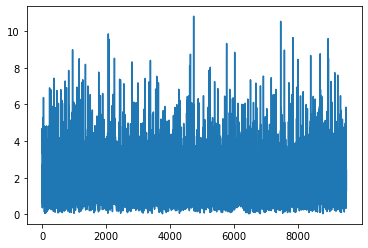

In [14]:
plt.plot(xaxis,x1history1); 

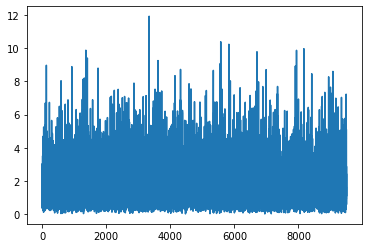

In [15]:
plt.plot(xaxis,x1history2); 

1.9182102377010042


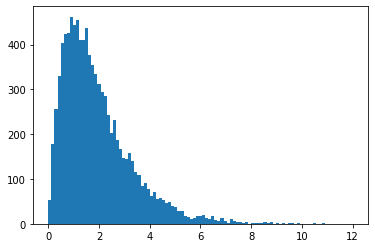

In [16]:
mean1=sum(x1history1)/len(x1history1)
print(mean1)
xaxis=np.linspace(0,12,100)
plt.hist(x1history1, bins=xaxis);

1.89640649902884


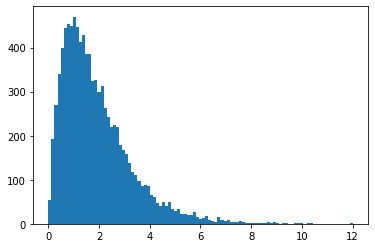

In [17]:
mean2=sum(x1history2)/len(x1history2)
print(mean2)
plt.hist(x1history2, bins=xaxis);

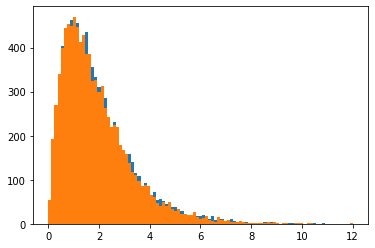

In [18]:
plt.hist(x1history1, bins=xaxis);
plt.hist(x1history2, bins=xaxis);

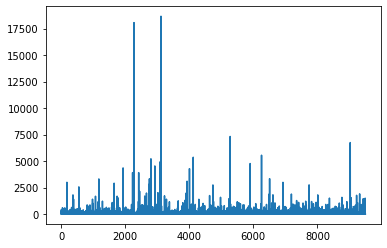

In [19]:
plt.plot(pixhistory1);

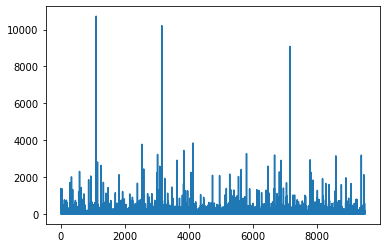

In [20]:
plt.plot(pixhistory2);

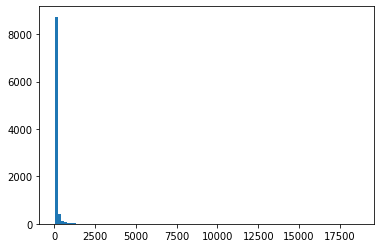

In [21]:
plt.hist(pixhistory1, bins=100);

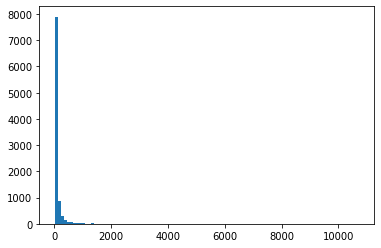

In [22]:
plt.hist(pixhistory2, bins=100);

In [16]:
##xseq1=[0.6,0.6,1,1,2,2,2,2,2,2];
##xseq2=[0.6,0.6,1,1,2,2,2,2,2,2];
##x1history1=[];
##x1history2=[];
##pixhistory1=[];
##pixhistory2=[];
##
##way1
##
##for i in range(10000):
##    for j in range(10):
##        xjcandidate=random.expovariate(1);
##        xseqcandidate=xseq1;
##        xseqcandidate[j]=xjcandidate;
##        if pi(xseqcandidate)> 20:
##            xseq1=xseqcandidate;
##        else:
##            while pi(xseqcandidate)<=20:
##                xjcandidate=random.expovariate(1);
##                xseqcandidate[j]=xjcandidate;
##            xseq1=xseqcandidate;
##    x1history1.append(xseq1[0]);
##    pixhistory1.append(pi(xseq1));   
##
##way2
##
##for k in range(10000):
##    for l in range(10):
##        xother=xseq2[:l]+xseq2[l+1:];
##        piother=pi(xseq2);
##        minimum=20/piother;
##        xseq2[l]=st.expon.rvs(minimum)
##    x1history2.append(xseq2[0]);
##    pixhistory2.append(pi(xseq2));

# 청파 과제

In [23]:
import numpy as np
from scipy.stats import uniform, expon, gaussian_kde
import matplotlib.pyplot as plt

In [24]:
def plotting(n):
  x = uniform.rvs(loc=-1, scale =2, size = n)
  y = uniform.rvs(loc =-1, scale=2, size = n)
  x_accepted = []
  y_accepted = []
  x_rejected = []
  y_rejected = []

  for i in range(n):
    if x[i]**2 + y[i]**2 <1 :
      x_accepted.append(x[i])
      y_accepted.append(y[i])

    else:
      x_rejected.append(x[i])
      y_rejected.append(y[i])

  fig, axis = plt.subplots(1,1, figsize=(10,10))     
  circle = plt.Circle((0,0),1, fill=False)
  axis.plot(x_accepted, y_accepted, '.', color = 'green')
  axis.plot(x_rejected, y_rejected, 'x', color = 'red') 
  axis.set_xlim([-1.5,1.5])
  axis.set_ylim([-1.5,1.5])
  axis.add_artist(circle)
  
  pi = 4 * len (x_accepted) / n

  plt.show()
  print('pi = ', pi)
  print('n =',n)

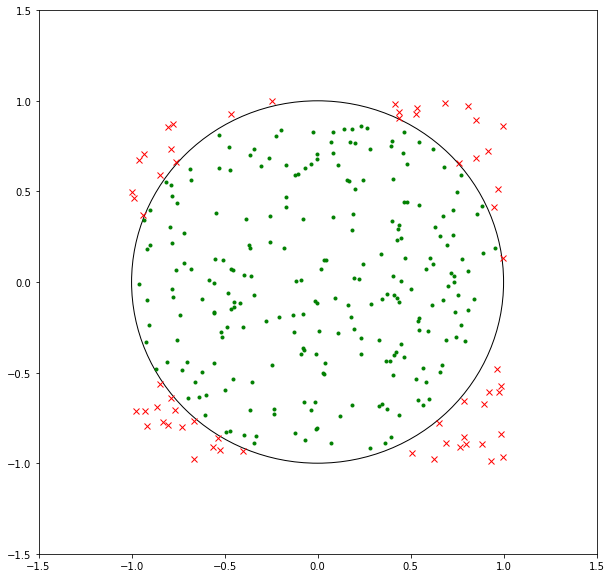

pi =  3.2
n = 300


In [25]:
plotting(300)

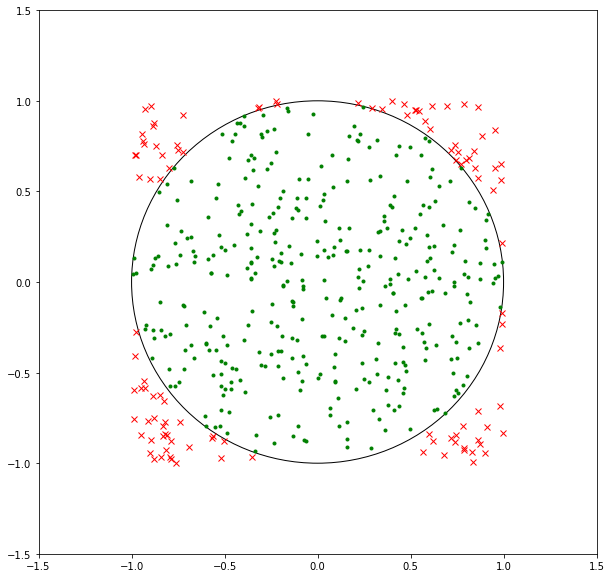

pi =  3.112
n = 500


In [26]:
plotting(500)

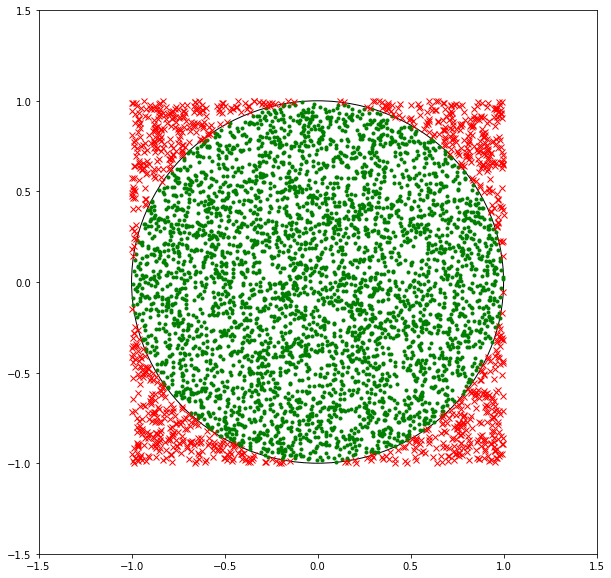

pi =  3.1736
n = 5000


In [27]:
plotting(5000)

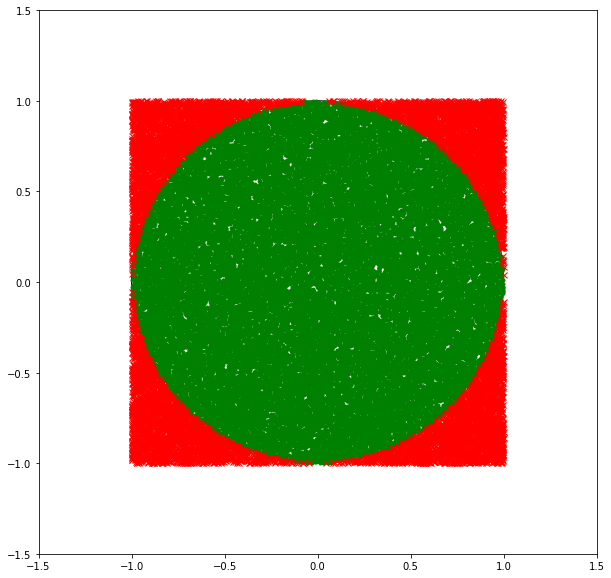

pi =  3.14912
n = 50000


In [28]:
plotting(50000)

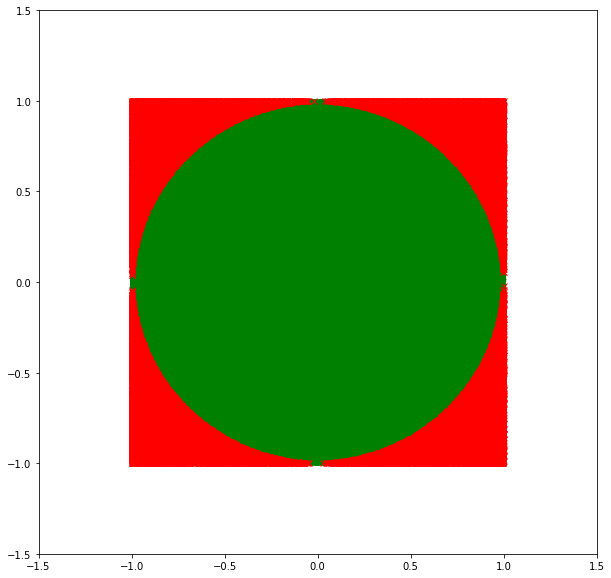

pi =  3.141184
n = 500000


In [29]:
plotting(500000)